In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read csv file and create initial panda
input_data="MortDataFile.csv"
in1_df=pd.read_csv(input_data)
in1_df.head()

,Country,Population,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Religion,Sect,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp
0,SDS,11062113,26.8,0.0,1600,46.0,2.5,0.41,0.8,Mixed,NaN,20.2,6.6,69.9,98.6,55.5
1,AFG,38041754,31.7,10.0,2000,27.8,10.2,0.28,0.5,Muslim,Sunni,26.0,5.5,104.3,62.3,52.8
2,ALB,2880917,97.2,15.0,12500,29.0,6.7,1.20,2.9,Muslim,NaN,62.1,21.7,10.8,8.8,79.0
3,DZA,43053054,75.1,14.0,15200,35.3,6.6,1.83,1.9,Muslim,Sunni,73.7,27.4,17.6,23.5,77.5
4,AGO,31825295,66.0,10.0,6800,42.7,2.9,0.21,0.8,Christian,Catholic,66.8,8.2,62.3,77.2,61.3


In [3]:
# Compute Life Expectancy at 5  and add column to Panda
in_df=in1_df
m_u_5=in_df["Mort_Under_5"]
life_exp=in_df["Life_Exp"]
q5=m_u_5/1000
adj_le=round(5+(life_exp-5)/(1-q5),1)
in_df["Adj_LE"]=adj_le

# These additons were done after the first few runs based on initial analysis

In [4]:
# Compute $ per person spent on medical and add as column to Panda plus add log of $ per person
pci=in_df["Per_Cap_Inc_2017"]
mxe=in_df["Medical_Exp"]
mx_dol=round(mxe*pci/100,0)
in_df["Mx"]=mx_dol
in_df["lnMx"]=np.log(mx_dol)
in_df['lnPCI']=np.log(pci)
in_df.head()

,Country,Population,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Religion,Sect,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp,Adj_LE,Mx,lnMx,lnPCI
0,SDS,11062113,26.8,0.0,1600,46.0,2.5,0.41,0.8,Mixed,NaN,20.2,6.6,69.9,98.6,55.5,61.0,40.0,3.688879,7.377759
1,AFG,38041754,31.7,10.0,2000,27.8,10.2,0.28,0.5,Muslim,Sunni,26.0,5.5,104.3,62.3,52.8,56.0,204.0,5.318120,7.600902
2,ALB,2880917,97.2,15.0,12500,29.0,6.7,1.20,2.9,Muslim,NaN,62.1,21.7,10.8,8.8,79.0,79.7,838.0,6.731018,9.433484
3,DZA,43053054,75.1,14.0,15200,35.3,6.6,1.83,1.9,Muslim,Sunni,73.7,27.4,17.6,23.5,77.5,79.2,1003.0,6.910751,9.629051
4,AGO,31825295,66.0,10.0,6800,42.7,2.9,0.21,0.8,Christian,Catholic,66.8,8.2,62.3,77.2,61.3,66.0,197.0,5.283204,8.824678


# This creates a data frame with only numbers for the purpose of computing a correlation coefficient matrix

In [5]:
# Drop Columns that are not numerical
nu_df=in_df.drop(["Country","Religion","Sect","Population"],axis=1)
nu_df.head()

,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp,Adj_LE,Mx,lnMx,lnPCI
0,26.8,0.0,1600,46.0,2.5,0.41,0.8,20.2,6.6,69.9,98.6,55.5,61.0,40.0,3.688879,7.377759
1,31.7,10.0,2000,27.8,10.2,0.28,0.5,26.0,5.5,104.3,62.3,52.8,56.0,204.0,5.318120,7.600902
2,97.2,15.0,12500,29.0,6.7,1.20,2.9,62.1,21.7,10.8,8.8,79.0,79.7,838.0,6.731018,9.433484
3,75.1,14.0,15200,35.3,6.6,1.83,1.9,73.7,27.4,17.6,23.5,77.5,79.2,1003.0,6.910751,9.629051
4,66.0,10.0,6800,42.7,2.9,0.21,0.8,66.8,8.2,62.3,77.2,61.3,66.0,197.0,5.283204,8.824678


# Saved Correlation Matrix to a csv file

In [6]:
# Compute Correlation Matrix
cor_mat=nu_df.corr()
cor_mat.to_csv("CorrelMatrx.csv")
cor_mat


,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp,Adj_LE,Mx,lnMx,lnPCI
Literacy,1.000000,0.751806,0.508199,-0.185734,0.030920,0.672269,0.446776,0.574900,0.525455,-0.846553,-0.865505,0.758701,0.692145,0.483998,0.722828,0.741789
Schooling,0.751806,1.000000,0.620141,-0.305588,0.158586,0.700399,0.372809,0.659036,0.554874,-0.777080,-0.770365,0.770373,0.731961,0.664194,0.806073,0.779496
Per_Cap_Inc_2017,0.508199,0.620141,1.000000,-0.311431,0.071634,0.568113,0.258863,0.667905,0.513454,-0.598092,-0.570466,0.685037,0.682670,0.821804,0.809916,0.851777
GINI,-0.185734,-0.305588,-0.311431,1.000000,-0.193566,-0.486179,-0.305140,-0.096090,-0.073080,0.303813,0.331416,-0.402010,-0.405264,-0.327785,-0.291908,-0.284477
Medical_Exp,0.030920,0.158586,0.071634,-0.193566,1.000000,0.217014,0.225931,0.165853,0.179900,-0.093926,-0.093001,0.129717,0.128205,0.405749,0.321837,0.050209
Doctors,0.672269,0.700399,0.568113,-0.486179,0.217014,1.000000,0.530135,0.595930,0.510380,-0.713331,-0.703945,0.721102,0.688748,0.626830,0.736935,0.679467
Hosp_Beds,0.446776,0.372809,0.258863,-0.305140,0.225931,0.530135,1.000000,0.258115,0.187713,-0.417847,-0.389725,0.332381,0.291281,0.316346,0.417328,0.347319
Urbanization,0.574900,0.659036,0.667905,-0.096090,0.165853,0.595930,0.258115,1.000000,0.705046,-0.621365,-0.600820,0.685347,0.677202,0.601841,0.750368,0.756941
Obseity,0.525455,0.554874,0.513454,-0.073080,0.179900,0.510380,0.187713,0.705046,1.000000,-0.634698,-0.609979,0.594959,0.561351,0.473184,0.652337,0.640913
Infant_Mort,-0.846553,-0.777080,-0.598092,0.303813,-0.093926,-0.713331,-0.417847,-0.621365,-0.634698,1.000000,0.940899,-0.929538,-0.885751,-0.580594,-0.790867,-0.794024


# Although we did not ulitmately use these, pie charts seemed right for distributions of religions

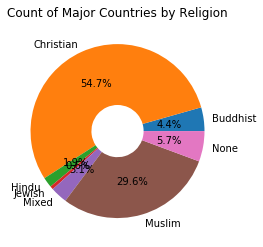

In [7]:
# pie plot religions by count


y=in_df.groupby(["Religion"]).size()

fig, ax1=plt.subplots()
plt.title("Count of Major Countries by Religion")
plt.pie(y,labels=y.index,wedgeprops=dict(width=.7),autopct='%2.1f%%')
plt.savefig('Religion_Pie.png')
plt.show()



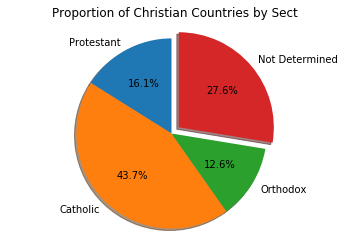

In [8]:
# Get religous sects
sun_ct=0
shi_ct=0
mus_ct=0
pro_ct=0
cat_ct=0
ort_ct=0
chr_ct=0

for index, row in in_df.iterrows():
    rel=in_df.iloc[index,9]
    sect=in_df.iloc[index,10]
    if rel=="Muslim":
        if in_df.iloc[index,10]=="Sunni":
            sun_ct+=1
        elif in_df.iloc[index,10]=="Shia":
            shi_ct+=1
        else: 
            mus_ct +=1
    elif rel=="Christian":
        if in_df.iloc[index,10]=="Protestant":
            pro_ct+=1
        elif in_df.iloc[index,10]=="Catholic":
            cat_ct+=1
        elif in_df.iloc[index,10]=="Orthodox":
            ort_ct+=1
        else: 
            chr_ct +=1

# Pie plot of Christian sects

labels="Protestant","Catholic","Orthodox","Not Determined"            
sizes=[pro_ct,cat_ct,ort_ct,chr_ct]
explode=(0,0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct="%2.1f%%",shadow=True,startangle=90)
plt.title("Proportion of Christian Countries by Sect")
ax1.axis('equal')
plt.savefig('Christian_Pie.png')
plt.show()


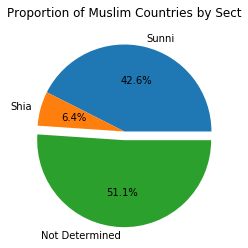

In [9]:
# Pie plot of Muslim sects

labels="Sunni","Shia","Not Determined"
sizes=[sun_ct,shi_ct,mus_ct]
explode=(0,0,.1)

fig1, ax1 = plt.subplots()
plt.title("Proportion of Muslim Countries by Sect")
ax1.pie(sizes,explode=explode,labels=labels,autopct="%2.1f%%")
plt.savefig('Muslim_Pie.png')
plt.show()


# The graphic production is below.  With the graph we printing the correlation coefficient and linear regression results. Since linear regression will not operate with NaN, we added a mask to some to remove any (x,y) pairs that were incomplete.

# A reference square was added for the USA

Correlation : -0.8465530494793788
Slope : -0.8272316703822421 and Intercept : 91.54959422976837


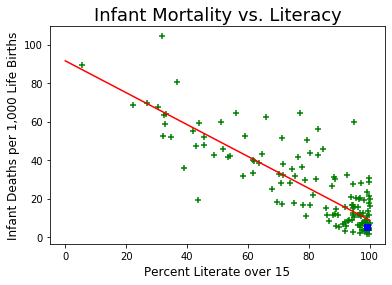

In [10]:
# Graph of Infant Mortality vs. Literacy
ind_var="Literacy"
dep_var="Infant_Mort"
plt.scatter(in_df[ind_var],in_df[dep_var],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')
plt.title("Infant Mortality vs. Literacy", size=18)
plt.xlabel("Percent Literate over 15", size = 12)
plt.ylabel("Infant Deaths per 1,000 Life Births",size=12)
print(f"Correlation : {cor_mat.iloc[0,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=intercept
end=slope*100+intercept
plt.plot([0,100],[start,end],color='red')
plt.savefig('IMvLit.png')
plt.show()

# Infant mortality most correlated to Literacy (and education) followed by (per capita income) Adult life expectancy most correlated to (log per capita income & log medical spending) followed by level of education

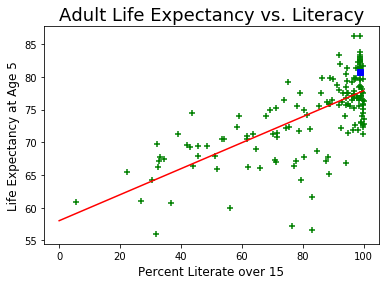

Correlation : 0.6921450230059222
Slope : 0.19869103865572596 and Intercept : 58.009152187469326


In [12]:
# Graph of Life Expectancy at 5 vs. Literacy
ind_var="Literacy"
dep_var="Adj_LE"
plt.scatter(in_df[ind_var],in_df[dep_var],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Literacy", size=18)
plt.xlabel("Percent Literate over 15", size = 12)
plt.ylabel("Life Expectancy at Age 5",size=12)

slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept

start=intercept
end=slope*100+intercept
plt.plot([0,100],[start,end],color='red')
plt.savefig('LEvLit.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[0,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

# Since schooling was reported in full years, a histogram seemed appropriate.

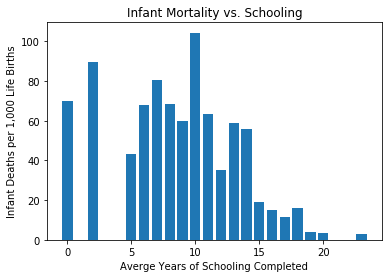

Correlation : -0.7770803121798733
Slope : -4.746487404396435 and Intercept : 85.24905064983697


In [13]:
# histogram of schooling vs infant mortality
ind_var="Schooling"
dep_var="Infant_Mort"
plt.bar(in_df["Schooling"],in_df["Infant_Mort"])
plt.title("Infant Mortality vs. Schooling")
plt.ylabel("Infant Deaths per 1,000 Life Births")
plt.xlabel("Averge Years of Schooling Completed")
mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept
plt.savefig('IMvLES_Hist.png')
plt.show()

print(f"Correlation : {cor_mat.iloc[1,9]}")
print(f"Slope : {slope} and Intercept : {intercept}")

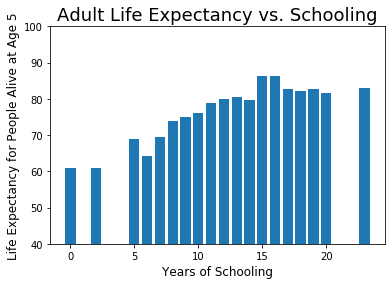

Correlation : 0.7319610279680754
Slope : 1.3122486227737094 and Intercept : 57.26087875060167


In [14]:
# Histogram of LE at 5 vs schooling
ind_var="Schooling"
dep_var="Adj_LE"
plt.bar(in_df["Schooling"],in_df["Adj_LE"])
plt.title("Adult Life Expectancy vs. Schooling", size=18)
plt.ylim(40,100)
plt.ylabel("Life Expectancy for People Alive at Age 5", size =12)
plt.xlabel("Years of Schooling", size=12)

mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept

plt.savefig('LEvSch_Hist.png')
plt.show()

print(f"Correlation : {cor_mat.iloc[1,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

# We did not always include the regression line, the first pass was for correlation, and to see how tight (fitable) the graphs were

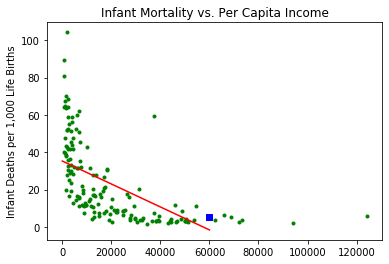

Correlation : -0.5980918171961291
Slope : -0.0006151194383463065 and Intercept : 35.30930932714168


In [18]:
# Plot Per Cap Income vs Infant Mort
ind_var="Per_Cap_Inc_2017"
dep_var="Infant_Mort"
plt.scatter(in_df["Per_Cap_Inc_2017"],in_df["Infant_Mort"],color='g',marker='.')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Per Capita Income")
plt.ylabel("Infant Deaths per 1,000 Life Births")


slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=intercept
end=slope*60000+intercept
plt.plot([0,60000],[start,end],color='red')
plt.savefig('IMvPCI.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[2,9]}")
print(f"Slope : {slope} and Intercept : {intercept}")

# Based on a visual inspection, this appeared to have be a logarithmic pattern. (The art of data analytics???) It is a linear regression between ln(x) and y

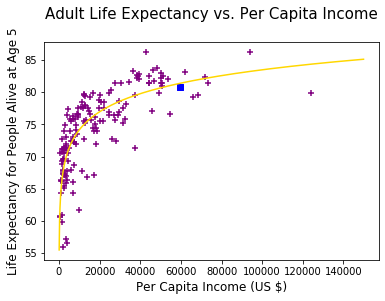

Correlation : 0.6826701931946562
Correlation of log: 0.7996892849145202
Slope : 4.049099989814511 and Intercept : 36.870510327591035


In [19]:
# Plot per cap income vs LE at 5
ind_var="Per_Cap_Inc_2017"
dep_var="Adj_LE"
plt.scatter(in_df["Per_Cap_Inc_2017"],in_df["Adj_LE"],color='purple',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Per Capita Income\n", size=15)
plt.ylabel("Life Expectancy for People Alive at Age 5", size=12)
plt.xlabel("Per Capita Income (US $)", size=12)
slope=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).slope
intercept=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).intercept
x=np.arange(100,150000,100)
y=slope*np.log(x)+intercept
plt.plot(x,y,color='gold')
plt.savefig('LEvLnPCI.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[2,12]}")
print(f"Correlation of log: {cor_mat.iloc[15,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

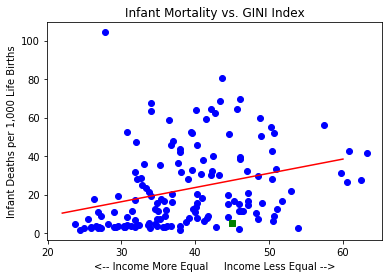

Correlation : 0.30381319603642404
Slope : 0.7383397922651771 and Intercept : -5.833975151398747


In [21]:
# Plot GINI vs Inf Mort
ind_var="GINI"
dep_var="Infant_Mort"
plt.scatter(in_df["GINI"],in_df["Infant_Mort"],color='b',marker='o')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='g',marker='s')

plt.title("Infant Mortality vs. GINI Index")
plt.ylabel("Infant Deaths per 1,000 Life Births")
plt.xlabel("<-- Income More Equal     Income Less Equal -->")
plt.savefig('IMvGINI.png')

mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept

start=slope*22+intercept
end=slope*60+intercept
plt.plot([22,60],[start,end],color='red')
plt.show()
print(f"Correlation : {cor_mat.iloc[3,9]}")
print(f"Slope : {slope} and Intercept : {intercept}")

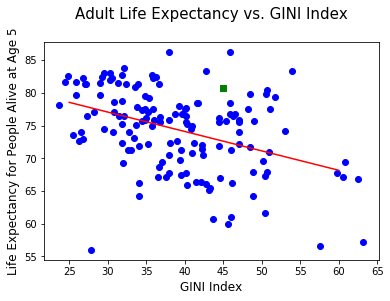

Correlation : -0.40526367536028574
Slope : -0.29681198172535833 and Intercept : 85.97062027449009


In [23]:
# Plot GINI vs LE at 5
ind_var="GINI"
dep_var="Adj_LE"
plt.scatter(in_df["GINI"],in_df["Adj_LE"],color='b',marker='o')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='g',marker='s')

plt.title("Adult Life Expectancy vs. GINI Index\n", size=15)
plt.ylabel("Life Expectancy for People Alive at Age 5",size=12)
plt.xlabel("GINI Index",size=12)

mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept

start=slope*25+intercept
end=slope*60+intercept
plt.plot([25,60],[start,end],color='red')
plt.savefig('LEvGINI.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[3,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

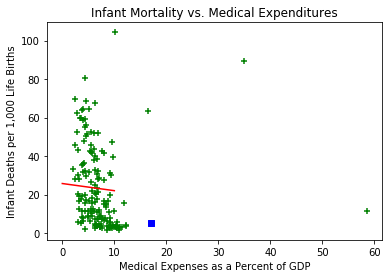

Correlation : -0.09392552230236834
Slope : -0.37112220994086337 and Intercept : 25.771866732798287


In [25]:
# Plot % Med Exp vs Inf Mort
ind_var="Medical_Exp"
dep_var="Infant_Mort"
plt.scatter(in_df["Medical_Exp"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Medical Expenditures")
plt.ylabel("Infant Deaths per 1,000 Life Births")
plt.xlabel("Medical Expenses as a Percent of GDP")

slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*0+intercept
end=slope*10+intercept
plt.plot([0,10],[start,end],color='red')

plt.savefig('IMvPctMedExp.png')
plt.show()

print(f"Correlation : {cor_mat.iloc[4,9]}")
print(f"Slope : {slope} and Intercept : {intercept}")

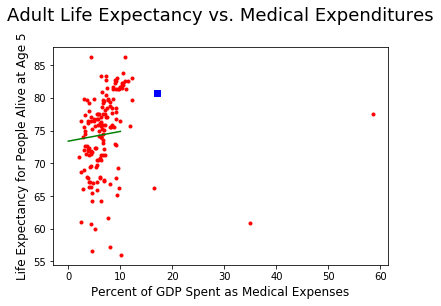

Correlation : 0.1282053819290679
Slope : 0.1488153701363619 and Intercept : 73.38247551692665


In [28]:
# Plot % Medical Exp vs LE at 5
ind_var="Medical_Exp"
dep_var="Adj_LE"
plt.scatter(in_df["Medical_Exp"],in_df["Adj_LE"],color='r',marker='.')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Medical Expenditures\n", size=18)
plt.ylabel("Life Expectancy for People Alive at Age 5",size=12)
plt.xlabel("Percent of GDP Spent as Medical Expenses", size=12)

slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*0+intercept
end=slope*10+intercept
plt.plot([0,10],[start,end],color='g')

plt.savefig('LEvPctMedExp.png')
plt.show()


print(f"Correlation : {cor_mat.iloc[4,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

Correlation : -0.713330850540824
Slope : -9.824238569987084 and Intercept : 40.439285374009316


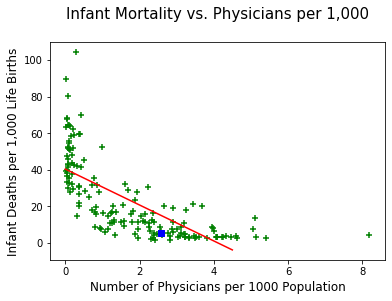

In [29]:
# Plot Phys per 1K vs Inf Mort
ind_var="Doctors"
dep_var="Infant_Mort"
plt.scatter(in_df["Doctors"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Physicians per 1,000\n",size=15)
plt.ylabel("Infant Deaths per 1,000 Life Births", size=12)
plt.xlabel("Number of Physicians per 1000 Population",size=12)
print(f"Correlation : {cor_mat.iloc[5,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=slope*0+intercept
end=slope*4.5+intercept
plt.plot([0,4.5],[start,end],color='red')
plt.savefig('IMvPhys.png')
plt.show()

# Since there seems to be a lot of data above the regression line on the ends and below it on the beginning, an inverse (1/x) would likely be the a fit to test, but rather than perform differential calculus on a fitted curve (did not want to try to explain) to get the instantaneous slope, we divided it into 3 bins and looked at the piecewise slopes to determine the impact of 1 physician per 1000 on infant mortality.

In [30]:
# Split the doctors into 3 equal sized bins based on size, then get x's and y's for each bin
cut_df=pd.qcut(in_df["Doctors"],3,labels=["lo","mid","hi"])
new_df=in_df
new_df["Rank"]=cut_df

new_df.head()

,Country,Population,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Religion,...,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp,Adj_LE,Mx,lnMx,lnPCI,Rank
0,SDS,11062113,26.8,0.0,1600,46.0,2.5,0.41,0.8,Mixed,...,20.2,6.6,69.9,98.6,55.5,61.0,40.0,3.688879,7.377759,lo
1,AFG,38041754,31.7,10.0,2000,27.8,10.2,0.28,0.5,Muslim,...,26.0,5.5,104.3,62.3,52.8,56.0,204.0,5.318120,7.600902,lo
2,ALB,2880917,97.2,15.0,12500,29.0,6.7,1.20,2.9,Muslim,...,62.1,21.7,10.8,8.8,79.0,79.7,838.0,6.731018,9.433484,mid
3,DZA,43053054,75.1,14.0,15200,35.3,6.6,1.83,1.9,Muslim,...,73.7,27.4,17.6,23.5,77.5,79.2,1003.0,6.910751,9.629051,mid
4,AGO,31825295,66.0,10.0,6800,42.7,2.9,0.21,0.8,Christian,...,66.8,8.2,62.3,77.2,61.3,66.0,197.0,5.283204,8.824678,lo


In [32]:
#set up x and y
x1=[]
x2=[]
x3=[]
y1=[]
y2=[]
y3=[]
ini1=[0,0,0]

# Loop thru panda to get sets of x and y
for index, row in new_df.iterrows():
    rank=new_df.iloc[index,20]
    x=new_df.iloc[index,7]
    y=new_df.iloc[index,13]
    if rank=="lo":
        if ini1[0]==0:
            x1_min=x
            x1_max=x
            ini1[0]=1
            x1.append(x)
            y1.append(y)
        else:
            if x<x1_min:
                x1_min=x
            elif x>x1_max:
                x1_max=x
            x1.append(x)
            y1.append(y)
    elif rank=='mid':
        if ini1[1]==0:
            x2_min=x
            x2_max=x
            ini1[1]=1
            x2.append(x)
            y2.append(y)
        else:
            if x<x2_min:
                x2_min=x
            elif x>x2_max:
                x2_max=x
            x2.append(x)
            y2.append(y)
    else:
        if ini1[2]==0:
            x3_min=x
            x3_max=x
            ini1[2]=1
            x3.append(x)
            y3.append(y)
        else:
            if x<x3_min:
                x3_min=x
            elif x>x3_max:
                x3_max=x
            x3.append(x)
            y3.append(y)

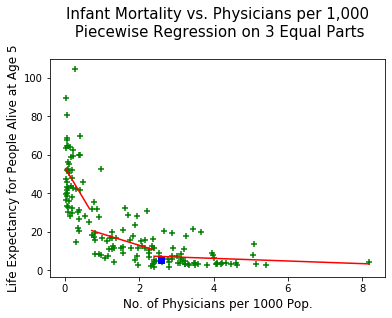

Slopes : -32.422353445696004, -5.978842820214431, -0.6858870784993532


In [33]:
# Plot Doctors vs Infant Mort
ind_var="Doctors"
dep_var="Infant_Mort"
plt.scatter(in_df[ind_var],in_df[dep_var],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')
plt.title("Infant Mortality vs. Physicians per 1,000\n Piecewise Regression on 3 Equal Parts\n", size =15)
plt.ylabel("Life Expectancy for People Alive at Age 5", size =12)
plt.xlabel("No. of Physicians per 1000 Pop.", size =12)

# Plot each piece of the piecewise regression
slope1=st.linregress(x1,y1).slope
intercept=st.linregress(x1,y1).intercept
y1_min=x1_min*slope1+intercept
y1_max=x1_max*slope1+intercept
plt.plot([x1_min,x1_max],[y1_min,y1_max],color='r')

slope2=st.linregress(x2,y2).slope
intercept=st.linregress(x2,y2).intercept
y2_min=x2_min*slope2+intercept
y2_max=x2_max*slope2+intercept
plt.plot([x2_min,x2_max],[y2_min,y2_max],color='r')

slope3=st.linregress(x3,y3).slope
intercept=st.linregress(x3,y3).intercept
y3_min=x3_min*slope3+intercept
y3_max=x3_max*slope3+intercept
plt.plot([x3_min,x3_max],[y3_min,y3_max],color='r')
plt.savefig('IMvPhys3.png')
plt.show()

print(f'Slopes : {slope1}, {slope2}, {slope3}')

# Although the graph indicates a logarithmic function as the fit, the data is so scattered, there are better predictors. Also # of physicians is highly correlated to other factors.

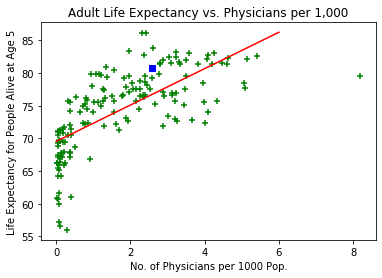

Correlation : -0.4178473853092684
Slope : 2.7866136386312172 and Intercept : 69.53275006318474


In [37]:
# Plot doctors vs LE at 5
ind_var="Doctors"
dep_var="Adj_LE"
plt.scatter(in_df["Doctors"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Physicians per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
plt.xlabel("No. of Physicians per 1000 Pop.")


slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*0+intercept
end=slope*6+intercept
plt.plot([0,6],[start,end],color='red')
plt.savefig('LEvPhys.png')
plt.show()

print(f"Correlation : {cor_mat.iloc[6,9]}")
print(f"Slope : {slope} and Intercept : {intercept}")

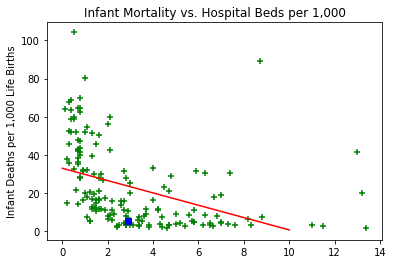

Correlation : -0.4178473853092684
Slope : -3.229866473567962 and Intercept : 33.06703236155874


In [39]:
ind_var="Hosp_Beds"
dep_var="Infant_Mort"
plt.scatter(in_df["Hosp_Beds"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Hospital Beds per 1,000")
plt.ylabel("Infant Deaths per 1,000 Life Births")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*0+intercept
end=slope*10+intercept
plt.plot([0,10],[start,end],color='red')

plt.savefig('IMvBeds.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[6,9]}")

print(f"Slope : {slope} and Intercept : {intercept}")

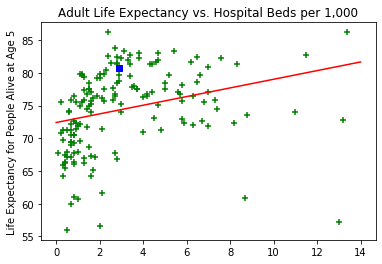

Correlation : 0.2912810840260219
Slope : 0.6614352969572584 and Intercept : 72.40792763461805


In [40]:
ind_var="Hosp_Beds"
dep_var="Adj_LE"
plt.scatter(in_df["Hosp_Beds"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')
plt.title("Adult Life Expectancy vs. Hospital Beds per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
plt.savefig('LEvBeds.png')
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*0+intercept
end=slope*14+intercept
plt.plot([0,14],[start,end],color='red')
plt.show()
print(f"Correlation : {cor_mat.iloc[6,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

# The graph appears to peak around 4 beds per 1000 and then decline. Very few beds means limited medical resources, but a great number of beds means the country has a "sick" population.

# performed a second degree polynomial fit.

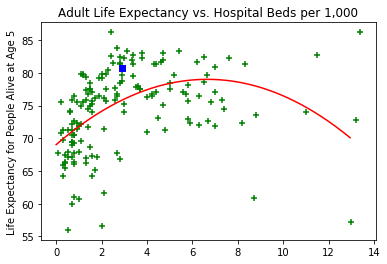

In [41]:
ind_var="Hosp_Beds"
dep_var="Adj_LE"
plt.scatter(in_df["Hosp_Beds"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Hospital Beds per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
z=np.polyfit(in_df[ind_var],in_df[dep_var],2)
x=np.arange(0,13,step=.05)
y=z[0]*x**2+z[1]*x+z[2]
plt.plot(x,y,color='r')
plt.savefig("LevBeds2.png")
plt.show()

# Though a bar chart might have been a good way to show the comparisons of averages by religion, the standard deviations made grouping by religion less meaningful than we hoped. Also, after considering other factors, the predominant religion does not appear to have a material impact. The need to consider the standard deviation made a box and whisker graph an appropriate illustration.

In [42]:
# group by religion 
rel_df=in_df.groupby(["Religion"]).mean()
rel_std=in_df.groupby(["Religion"]).std()
rel_im=rel_df["Infant_Mort"]
rel_im_std=rel_std["Infant_Mort"]
rel_al=rel_df["Adj_LE"]
rel_al_std=rel_std["Adj_LE"]
print(rel_im)
print(rel_im_std)
print(rel_al)
print(rel_al_std)

# once larger sample, look at box and whisker plot

Religion
Buddhist     22.642857
Christian    19.991954
Hindu        23.166667
Jewish        3.300000
Mixed        27.720000
Muslim       31.882979
None          7.677778
Name: Infant_Mort, dtype: float64
Religion
Buddhist     17.851691
Christian    18.529663
Hindu        13.305763
Jewish             NaN
Mixed        33.633644
Muslim       24.333260
None          6.491875
Name: Infant_Mort, dtype: float64
Religion
Buddhist     74.442857
Christian    74.697701
Hindu        74.600000
Jewish       83.300000
Mixed        75.460000
Muslim       72.951064
None         78.188889
Name: Adj_LE, dtype: float64
Religion
Buddhist      6.364709
Christian     6.425530
Hindu         2.749545
Jewish             NaN
Mixed        10.782300
Muslim        5.504657
None          4.173561
Name: Adj_LE, dtype: float64



For Mixed, there are 5 point and there are 0 outliers.

For Muslim, there are 47 point and there are 2 outliers.
The outliers are : [56.0, 60.8]

For Christian, there are 87 point and there are 5 outliers.
The outliers are : [60.7, 61.7, 57.2, 59.9, 56.6]

For Buddhist, there are 7 point and there are 1 outliers.
The outliers are : [86.2]

For None, there are 9 point and there are 0 outliers.

For Hindu, there are 3 point and there are 0 outliers.

For Jewish, there are 1 point and there are 0 outliers.


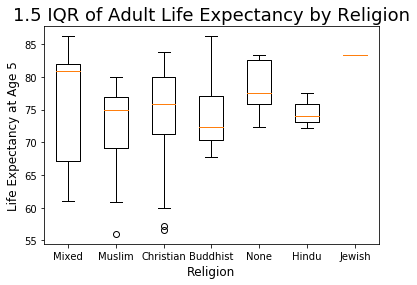

In [43]:
# Loop through each religion, get data points, determine IQR and points outside IQR for each
# Also set up list of lists for plotting box and whisker plot
plot_list=[]
religions=in_df["Religion"].unique()
for faith in religions:
    plot_points=in_df[in_df["Religion"]==faith]["Adj_LE"].to_list()
    low_end=np.median(plot_points)-1.5*st.iqr(plot_points)
    hi_end=np.median(plot_points)+1.5*st.iqr(plot_points)
    plot_list.append(plot_points)
    ol_list=[]
    for pt in plot_points:
            if (pt<low_end) or (pt>hi_end):
                ol_list.append(pt)
    # Print output
    print(f"\nFor {faith}, there are {len(plot_points)} point and there are {len(ol_list)} outliers.")
    if ((len(ol_list))>0):
        print(f"The outliers are : {ol_list}")# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot the box and whisker plot for this regimen
# Set up labels
fig1, ax1 = plt.subplots()
ax1.set_title('1.5 IQR of Adult Life Expectancy by Religion', size=18)
ax1.set_ylabel('Life Expectancy at Age 5', size =12)
ax1.set_xlabel('Religion', size=12)

bp=plt.boxplot(plot_list, labels=religions)
plt.savefig('RelBx.png')
plt.show()


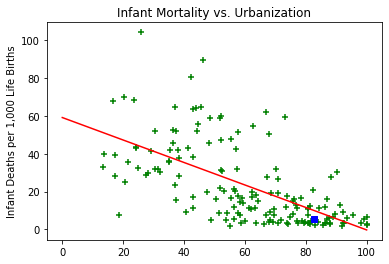

Correlation : -0.6213646964165406
Slope : -0.5947241954965043 and Intercept : 59.17266939684001


In [44]:
ind_var="Urbanization"
dep_var="Infant_Mort"
plt.scatter(in_df["Urbanization"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Urbanization")
plt.ylabel("Infant Deaths per 1,000 Life Births")

slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept

start=slope*0+intercept
end=slope*100+intercept
plt.plot([0,100],[start,end],color='red')
plt.savefig('IMvUrb.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[7,9]}")
print(f"Slope : {slope} and Intercept : {intercept}")

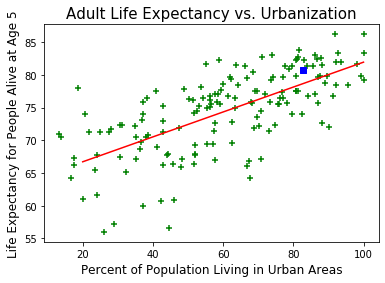

Correlation : 0.6772022169262812
Slope : 0.19041256758166952 and Intercept : 62.902508678815465


In [47]:
ind_var="Urbanization"
dep_var="Adj_LE"
plt.scatter(in_df["Urbanization"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Urbanization", size=15)
plt.ylabel("Life Expectancy for People Alive at Age 5", size =12)
plt.xlabel("Percent of Population Living in Urban Areas", size =12)
plt.savefig('LEvUrb.png')
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*20+intercept
end=slope*100+intercept
plt.plot([20,100],[start,end],color='r')
plt.savefig('LEvUrb.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[7,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

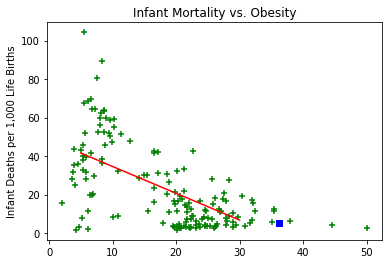

Correlation : -0.6346978743010304
Slope : -1.3912519091631939 and Intercept : 48.54156318073739


In [50]:
ind_var="Obseity"
dep_var="Infant_Mort"
plt.scatter(in_df["Obseity"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Obesity")
plt.ylabel("Infant Deaths per 1,000 Life Births")


slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*5+intercept
end=slope*30+intercept
plt.plot([5,30],[start,end],color='r')
plt.savefig('IMvObes.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[8,9]}")
print(f"Slope : {slope} and Intercept : {intercept}")


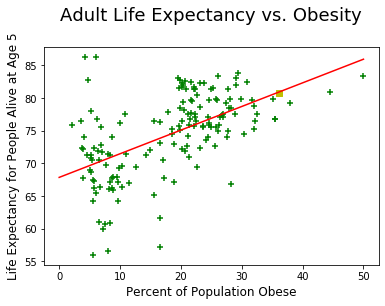

Correlation : 0.5613513500916664
Slope : 0.36147786307060714 and Intercept : 67.84012014687107


In [51]:
ind_var="Obseity"
dep_var="Adj_LE"
plt.scatter(in_df["Obseity"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='y',marker='s')
plt.title("Adult Life Expectancy vs. Obesity\n",size=18)
plt.ylabel("Life Expectancy for People Alive at Age 5",size=12)
plt.xlabel("Percent of Population Obese",size=12)

mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept

start=slope*0+intercept
end=slope*50+intercept
plt.plot([0,50],[start,end],color='r')
plt.savefig('LEvObes.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[8,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

# The percent of income spent on medical did not have a significant impact. This led us to try the actual dollar equivalent spent. (GPI x % Medical Exp). The correlation jumped from 60 to 80%

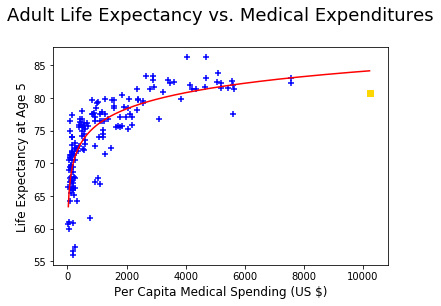

Correlation : 0.6789523229054945


In [52]:
# Graph of Life Expectancy at 5 vs. Funds Spent on Medical
ind_var="Mx"
dep_var="Adj_LE"
plt.scatter(in_df[ind_var],in_df[dep_var],color='b',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150], color="gold", marker='s')
plt.title("Adult Life Expectancy vs. Medical Expenditures\n",size=18)
plt.xlabel("Per Capita Medical Spending (US $)", size = 12)
plt.ylabel("Life Expectancy at Age 5",size=12)
slope=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).slope
intercept=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).intercept
x=np.arange(30,10230,10)
y=slope*np.log(x)+intercept
plt.plot(x,y,color='red')
plt.savefig('LEvDolMedExp.png')
plt.show()
print(f"Correlation : {cor_mat.iloc[13,12]}")